In [1]:
import pandas as pd
from scipy import spatial
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\Owen\\Desktop\\pmp\\Topic2_4470_Word_Vectors.csv',header=None,sep=',')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,?,-0.014292,0.007838,-0.002896,0.007041,0.009640,0.000983,0.005310,0.001771,0.005891,...,-0.001305,-0.001553,-0.014225,0.002071,-0.023745,-0.005997,-0.003445,-0.024899,0.017323,-0.002442
1,?,-0.019124,0.004895,0.000261,-0.002996,0.004262,0.007593,-0.008057,0.016138,0.009148,...,-0.004555,0.008343,-0.014806,-0.012592,-0.020747,-0.007772,0.000497,-0.021847,0.021408,-0.009102
2,?,-0.015925,0.008959,0.012728,0.001627,0.009002,-0.009196,0.000113,0.014790,0.001011,...,0.005379,-0.000023,-0.007696,-0.004017,-0.019730,-0.013710,0.004691,-0.028078,0.021047,0.000338
3,'',0.242879,-0.357776,-1.036951,0.469952,-1.611660,-0.920393,-1.047843,0.812955,0.077639,...,0.014267,-0.450508,-0.778890,0.135372,0.134435,-0.894964,0.506059,-1.636131,1.420139,-1.053915
4,proyecto,0.006645,0.002655,-0.002004,0.011898,0.009993,-0.003337,-0.017918,0.001710,0.001841,...,0.001581,0.004362,-0.014756,-0.015226,-0.023745,-0.009586,-0.014421,-0.004782,0.034854,0.013337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49346,1.9,-0.002337,0.002169,-0.015479,0.009018,-0.012332,-0.005880,-0.001747,-0.015124,-0.000619,...,-0.009729,-0.007291,-0.004602,0.009725,0.012778,0.003016,-0.001009,-0.031664,-0.003349,-0.005023
49347,ceramic-polymer,-0.015645,0.027500,0.015190,0.001908,0.000280,-0.001888,0.004398,0.010840,0.003353,...,-0.007756,-0.011556,-0.001872,0.004398,-0.009889,-0.000199,-0.004234,-0.014100,0.006598,0.004098
49348,tape-casting,-0.035595,0.022825,-0.005805,0.004398,-0.009485,-0.004525,-0.005787,0.019662,0.010332,...,-0.010189,-0.011675,-0.012465,0.002276,-0.001751,-0.007735,0.009182,-0.042329,0.036488,-0.005002
49349,disc-type,-0.058460,0.017930,-0.020420,-0.003634,-0.013074,-0.009637,0.006483,0.024382,0.010641,...,-0.019693,-0.009310,-0.036355,0.006278,-0.007550,-0.006744,0.019674,-0.064233,0.038439,-0.016577


In [4]:
#stopword remove
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stops = stopwords.words('english')
en_stops.extend([':','A','The',')','(','An','via',',','using','Small','Medium',
                 'Large','?',';','in','many','.','>','<','br/','This','including','also',
                 'one','two','use','Use','Research','\'','\"'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
en_stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
df.drop(df.index[df[0].isin(en_stops)], inplace = True)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
3,'',0.242879,-0.357776,-1.036951,0.469952,-1.611660,-0.920393,-1.047843,0.812955,0.077639,...,0.014267,-0.450508,-0.778890,0.135372,0.134435,-0.894964,0.506059,-1.636131,1.420139,-1.053915
4,proyecto,0.006645,0.002655,-0.002004,0.011898,0.009993,-0.003337,-0.017918,0.001710,0.001841,...,0.001581,0.004362,-0.014756,-0.015226,-0.023745,-0.009586,-0.014421,-0.004782,0.034854,0.013337
5,hombre,-0.013173,0.005983,0.002263,0.010255,0.002010,-0.004880,-0.009383,0.012091,-0.008488,...,0.005712,0.005137,-0.010636,-0.022955,-0.031071,-0.000086,-0.003307,-0.012513,0.032919,0.008704
6,30,-0.908531,-0.033861,-0.124413,-0.316041,0.550499,-0.068102,0.063906,0.945967,-0.010683,...,-0.064064,0.185626,-0.287499,0.059508,0.060407,0.128885,0.751422,-0.356749,0.473993,-0.148028
7,years,-0.991988,-0.052203,-0.746462,0.054751,0.091673,0.003364,0.058668,1.027198,-0.095780,...,0.173858,0.079364,-0.340901,0.004598,0.866518,-0.039558,0.529889,-0.528149,0.582073,-0.154103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49346,1.9,-0.002337,0.002169,-0.015479,0.009018,-0.012332,-0.005880,-0.001747,-0.015124,-0.000619,...,-0.009729,-0.007291,-0.004602,0.009725,0.012778,0.003016,-0.001009,-0.031664,-0.003349,-0.005023
49347,ceramic-polymer,-0.015645,0.027500,0.015190,0.001908,0.000280,-0.001888,0.004398,0.010840,0.003353,...,-0.007756,-0.011556,-0.001872,0.004398,-0.009889,-0.000199,-0.004234,-0.014100,0.006598,0.004098
49348,tape-casting,-0.035595,0.022825,-0.005805,0.004398,-0.009485,-0.004525,-0.005787,0.019662,0.010332,...,-0.010189,-0.011675,-0.012465,0.002276,-0.001751,-0.007735,0.009182,-0.042329,0.036488,-0.005002
49349,disc-type,-0.058460,0.017930,-0.020420,-0.003634,-0.013074,-0.009637,0.006483,0.024382,0.010641,...,-0.019693,-0.009310,-0.036355,0.006278,-0.007550,-0.006744,0.019674,-0.064233,0.038439,-0.016577


In [8]:
#remove numbers in the input data
get_df= pd.to_numeric(df[0],errors='coerce')

bool_series = pd.notnull(get_df) 
bool_series

3        False
4        False
5        False
6         True
7        False
         ...  
49346     True
49347    False
49348    False
49349    False
49350    False
Name: 0, Length: 49197, dtype: bool

In [9]:
#list the "number" object in in put data
df[bool_series]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
6,30,-0.908531,-0.033861,-0.124413,-0.316041,0.550499,-0.068102,0.063906,0.945967,-0.010683,...,-0.064064,0.185626,-0.287499,0.059508,0.060407,0.128885,0.751422,-0.356749,0.473993,-0.148028
17,2015,-0.368581,-0.188758,-0.178032,0.041550,0.180337,-0.055289,-0.047721,0.315974,0.061549,...,-0.070776,-0.123311,-0.125246,-0.134654,0.005734,0.080504,0.052312,-0.254406,0.280104,0.006660
20,25,-0.467297,-0.114319,-0.149865,-0.026322,0.291353,-0.068272,0.017396,0.481855,-0.045406,...,0.008336,0.127144,-0.198767,0.003422,0.060191,0.084261,0.343665,-0.190612,0.259904,-0.049848
96,278,-0.023828,-0.020038,-0.017771,-0.007862,-0.010955,-0.002218,-0.012407,0.021379,0.003860,...,-0.000558,0.010200,-0.009436,0.003025,-0.005081,0.006926,0.025414,-0.018420,0.011780,0.004918
128,23,0.024488,-0.002232,-0.001714,0.021488,0.011271,-0.014693,-0.009507,-0.008287,0.000476,...,0.006840,-0.013334,0.006995,0.005234,0.013535,0.001763,0.005122,-0.003292,0.000789,0.007377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49315,188.14,-0.011424,-0.004595,-0.004161,0.000896,0.017243,-0.000419,0.010767,0.009314,0.007421,...,0.001385,-0.006476,0.000448,0.009714,0.002485,-0.000609,0.003306,-0.019182,0.006983,-0.011256
49316,42.82,-0.012807,-0.013291,0.000401,0.002789,0.009485,0.004123,-0.001253,0.008915,-0.000658,...,0.002810,-0.001942,0.001188,-0.000956,0.003437,0.002333,0.012245,-0.008363,0.001926,-0.002123
49321,1.87,0.003267,-0.004160,-0.002333,-0.009973,0.014447,0.000163,-0.005596,0.008476,-0.004654,...,0.006516,0.002285,0.002840,0.001778,0.006985,0.003600,0.006292,-0.001922,-0.002481,-0.010620
49344,5737,0.003993,0.009449,0.012774,0.014258,0.008403,0.006635,-0.019113,0.000743,-0.005697,...,-0.004384,-0.003152,-0.014007,0.005720,0.010350,-0.004214,-0.003116,-0.011364,0.011050,0.001171


In [10]:
#remove "number" object in the dataset
df.drop(df.index[df[0].isin(df[bool_series][0])], inplace = True)

In [11]:
#49351 rows (input rows) vs 47000 rows (after clearning)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
3,'',0.242879,-0.357776,-1.036951,0.469952,-1.611660,-0.920393,-1.047843,0.812955,0.077639,...,0.014267,-0.450508,-0.778890,0.135372,0.134435,-0.894964,0.506059,-1.636131,1.420139,-1.053915
4,proyecto,0.006645,0.002655,-0.002004,0.011898,0.009993,-0.003337,-0.017918,0.001710,0.001841,...,0.001581,0.004362,-0.014756,-0.015226,-0.023745,-0.009586,-0.014421,-0.004782,0.034854,0.013337
5,hombre,-0.013173,0.005983,0.002263,0.010255,0.002010,-0.004880,-0.009383,0.012091,-0.008488,...,0.005712,0.005137,-0.010636,-0.022955,-0.031071,-0.000086,-0.003307,-0.012513,0.032919,0.008704
7,years,-0.991988,-0.052203,-0.746462,0.054751,0.091673,0.003364,0.058668,1.027198,-0.095780,...,0.173858,0.079364,-0.340901,0.004598,0.866518,-0.039558,0.529889,-0.528149,0.582073,-0.154103
9,work,-1.714099,0.291870,-0.900320,1.186268,-1.400966,0.459634,0.394019,-0.358624,-0.434260,...,-0.344437,-0.572115,-0.702981,0.036555,0.382482,0.830119,-0.537139,-0.581230,0.365941,-0.295305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49345,magneto-photocurrent,0.000772,-0.005020,-0.001443,0.014552,0.004731,-0.003609,-0.009770,-0.002167,-0.013751,...,-0.003411,-0.002718,-0.018247,0.006264,0.004802,-0.003425,0.002871,-0.024917,0.007310,0.003142
49347,ceramic-polymer,-0.015645,0.027500,0.015190,0.001908,0.000280,-0.001888,0.004398,0.010840,0.003353,...,-0.007756,-0.011556,-0.001872,0.004398,-0.009889,-0.000199,-0.004234,-0.014100,0.006598,0.004098
49348,tape-casting,-0.035595,0.022825,-0.005805,0.004398,-0.009485,-0.004525,-0.005787,0.019662,0.010332,...,-0.010189,-0.011675,-0.012465,0.002276,-0.001751,-0.007735,0.009182,-0.042329,0.036488,-0.005002
49349,disc-type,-0.058460,0.017930,-0.020420,-0.003634,-0.013074,-0.009637,0.006483,0.024382,0.010641,...,-0.019693,-0.009310,-0.036355,0.006278,-0.007550,-0.006744,0.019674,-0.064233,0.038439,-0.016577


In [12]:
new_df = df.loc[:, df.columns != 0]

In [13]:
new_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
3,0.242879,-0.357776,-1.036951,0.469952,-1.611660,-0.920393,-1.047843,0.812955,0.077639,0.406976,...,0.014267,-0.450508,-0.778890,0.135372,0.134435,-0.894964,0.506059,-1.636131,1.420139,-1.053915
4,0.006645,0.002655,-0.002004,0.011898,0.009993,-0.003337,-0.017918,0.001710,0.001841,0.021023,...,0.001581,0.004362,-0.014756,-0.015226,-0.023745,-0.009586,-0.014421,-0.004782,0.034854,0.013337
5,-0.013173,0.005983,0.002263,0.010255,0.002010,-0.004880,-0.009383,0.012091,-0.008488,0.028956,...,0.005712,0.005137,-0.010636,-0.022955,-0.031071,-0.000086,-0.003307,-0.012513,0.032919,0.008704
7,-0.991988,-0.052203,-0.746462,0.054751,0.091673,0.003364,0.058668,1.027198,-0.095780,0.227966,...,0.173858,0.079364,-0.340901,0.004598,0.866518,-0.039558,0.529889,-0.528149,0.582073,-0.154103
9,-1.714099,0.291870,-0.900320,1.186268,-1.400966,0.459634,0.394019,-0.358624,-0.434260,-0.655833,...,-0.344437,-0.572115,-0.702981,0.036555,0.382482,0.830119,-0.537139,-0.581230,0.365941,-0.295305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49345,0.000772,-0.005020,-0.001443,0.014552,0.004731,-0.003609,-0.009770,-0.002167,-0.013751,0.003425,...,-0.003411,-0.002718,-0.018247,0.006264,0.004802,-0.003425,0.002871,-0.024917,0.007310,0.003142
49347,-0.015645,0.027500,0.015190,0.001908,0.000280,-0.001888,0.004398,0.010840,0.003353,0.003227,...,-0.007756,-0.011556,-0.001872,0.004398,-0.009889,-0.000199,-0.004234,-0.014100,0.006598,0.004098
49348,-0.035595,0.022825,-0.005805,0.004398,-0.009485,-0.004525,-0.005787,0.019662,0.010332,0.004159,...,-0.010189,-0.011675,-0.012465,0.002276,-0.001751,-0.007735,0.009182,-0.042329,0.036488,-0.005002
49349,-0.058460,0.017930,-0.020420,-0.003634,-0.013074,-0.009637,0.006483,0.024382,0.010641,0.008010,...,-0.019693,-0.009310,-0.036355,0.006278,-0.007550,-0.006744,0.019674,-0.064233,0.038439,-0.016577


In [14]:
matrix_array=new_df.to_numpy()

In [15]:
matrix_array

array([[ 0.24287882, -0.35777566, -1.03695107, ..., -1.63613141,
         1.42013896, -1.05391538],
       [ 0.0066447 ,  0.00265451, -0.00200435, ..., -0.00478246,
         0.03485362,  0.01333732],
       [-0.01317317,  0.00598321,  0.00226336, ..., -0.01251267,
         0.03291901,  0.00870373],
       ...,
       [-0.0355951 ,  0.02282503, -0.00580515, ..., -0.04232861,
         0.0364881 , -0.00500166],
       [-0.05846043,  0.01793048, -0.02041978, ..., -0.06423273,
         0.03843851, -0.01657687],
       [-0.05400997,  0.01461924, -0.01717002, ..., -0.05760012,
         0.03537645, -0.01357833]])

In [16]:
#Calculate the cossin similarity matrix for input data
from sklearn.metrics.pairwise import cosine_similarity
cos_sim=cosine_similarity(matrix_array)

In [17]:
cos_sim.shape

(47000, 47000)

In [18]:
import math
#calcualte the euclidean for input data
npvec1, npvec2 = np.array(matrix_array[0]), np.array(matrix_array[1])
similirity=math.sqrt(((npvec1 - npvec2) ** 2).sum())
print('similirity:',similirity)

similirity: 9.744353182522044


In [19]:
 #cossin 
def cos_sim(vector_a, vector_b):

    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom #
    sim = 0.5 + 0.5 * cos # put the cos into range of [-1,1]
    return sim
 

vector_a, vector_b = np.array(matrix_array[0]), np.array(matrix_array[1])
similirity2=cos_sim(vector_a, vector_b)
print('similirity2:',similirity2)

similirity2: 0.8015069832117309


In [20]:
matrix_array[0]

array([ 0.24287882, -0.35777566, -1.03695107,  0.46995163, -1.61165976,
       -0.92039329, -1.04784286,  0.8129555 ,  0.07763919,  0.40697613,
        1.32716989, -1.00840843, -0.15525781,  0.11751208,  0.19408521,
        0.84074271, -0.53778124,  0.15768929,  0.4488987 , -0.72926593,
       -0.58345252,  1.75402582, -0.30448955, -0.30034822, -0.24734451,
        0.30986801, -0.41497129, -0.56778306, -0.15473457,  0.74023688,
        0.80535078, -0.2335635 ,  0.10564765,  1.49808145,  1.46376419,
       -0.86561412,  0.54836804, -0.39815638, -0.86454266,  2.64108634,
        0.11136475,  1.32302916,  0.93941891, -0.10490359,  0.39063081,
       -1.39327967,  0.47405505,  0.07939219,  0.83572221,  0.15436947,
       -0.22521049,  0.62853444, -2.09202147, -0.57162815,  0.22656937,
       -0.96752751,  0.26741514,  0.92161977,  0.13609155,  1.18648362,
       -2.32363248,  1.79173434,  1.15440869,  0.21538702,  0.80555099,
       -0.39522707, -1.44575834, -0.1863111 ,  1.53413689,  2.25

In [21]:
#breaking sentences
import re
def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

In [22]:
#demo
preprocess("our project is clustering the topics for bibliometrics")

['clustering', 'project', 'topics', 'bibliometrics']

In [23]:
#calculate the similarity between sentences
df.loc[df[0] == 'good']

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
1040,good,-0.605064,0.750338,-0.357561,0.559628,0.372538,-0.225532,0.20982,0.322781,-0.397406,...,0.429263,-0.070537,-0.025906,0.830147,0.928995,0.628726,0.62987,-0.647675,0.008297,0.498201


In [24]:
#show the word vectors for word "good"
good=np.array(df.loc[df[0] == 'good'])[0][1:]
good.astype(float)

array([-0.6050638 ,  0.75033778, -0.35756069,  0.55962807,  0.37253818,
       -0.22553228,  0.20982015,  0.32278138, -0.39740622, -0.11251175,
        0.60983092,  0.66415328, -0.6410203 , -0.2465214 ,  0.45571682,
       -1.41686964,  0.93193793,  0.31855482,  0.33465785,  0.28014287,
       -0.22833929,  0.30800176,  0.91108513, -0.14133626,  0.31309778,
        1.16345549,  0.43320203, -1.11014891,  0.81647634,  0.90124726,
        0.88448638,  0.37285435,  0.43028617,  0.9584955 , -0.99939501,
        0.33037791,  0.2496722 , -0.56141979, -0.22573456,  0.76829439,
        0.41068336,  0.1598134 , -0.70986271,  0.47615069,  0.724325  ,
        0.84300834,  0.37968373, -0.49013177,  0.20500499, -0.47323036,
       -0.10184456, -0.10935862, -0.90881866, -0.48304382, -0.17107232,
       -0.44038266,  0.58729094,  0.89631611,  0.53794736,  0.28038544,
       -1.0682838 ,  0.51772404,  0.23506904,  0.07441196, -1.44060099,
        0.65947533, -0.20023557, -0.08428721,  0.29650548,  0.08

In [25]:
# calculate the similarity between sentences ss1 and ss2
ss1="we have an apple"
ss2="the apple is owned by us"
import scipy
vector_11 = np.mean([df.loc[df[0] == word].values[0][1:].astype(float) for word in preprocess(ss1)],axis=0)
vector_22 = np.mean([df.loc[df[0] == word].values[0][1:].astype(float) for word in preprocess(ss2)],axis=0)
cosine = scipy.spatial.distance.cosine(vector_11, vector_22)
print('similarity between ss1 and ss2 is: ',round((1-cosine)*100,2),'%')
#good person vs research person ==58%
#good person vs nice person ==78%

similarity between ss1 and ss2 is:  59.14 %


In [26]:
# vector_11 is taking the average of word vectors of each words in ss1
vector_11

array([-0.02368197,  0.01278864, -0.00232564,  0.00274144, -0.02015077,
        0.00110137, -0.01028255,  0.0060642 ,  0.00731735,  0.0118547 ,
        0.02492996,  0.00098029, -0.00765314, -0.00194057, -0.00538484,
       -0.01603745,  0.0012542 ,  0.00446832,  0.01631443,  0.00610901,
       -0.01633447,  0.02361696,  0.01516676, -0.01566313,  0.02004468,
        0.01651367,  0.01469453, -0.02495989,  0.00636395,  0.0195251 ,
        0.0110039 ,  0.00842122,  0.00138341,  0.00940142,  0.00657012,
        0.01695958, -0.0001793 , -0.01667115, -0.00138245,  0.01436788,
        0.01756926, -0.00417639, -0.00837124, -0.0046242 , -0.00492918,
       -0.0006242 ,  0.00897326, -0.0044639 ,  0.01209431,  0.01010753,
        0.00894983,  0.00830819, -0.00972463,  0.00705869,  0.01971793,
       -0.00327531,  0.00520551,  0.01450831,  0.00872251,  0.01787499,
       -0.00039529,  0.0125823 , -0.00185692,  0.01439286, -0.00532308,
        0.00165117,  0.00140874,  0.00275977,  0.00675921,  0.00

In [50]:
#DBSCAN
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X = matrix_array
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

NameError: name 'options' is not defined

In [62]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 16816, 0: 30158, 1: 4, 2: 4, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3}

In [65]:
len(set(labels))

10

In [64]:
1 if -1 in labels else 0

1

In [39]:
core_samples_mask

array([False,  True,  True, ...,  True,  True,  True])

In [66]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [67]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 9
Estimated number of noise points: 16816
Silhouette Coefficient: -0.067


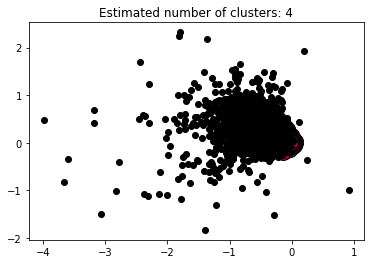

In [42]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(figsize=(60,60))
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    #cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             #markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
#for eps in np.arange(0.1, 50, 0.1):
    dbscan_model = None
    labels = None
    n_clusters_=None
    n_noise_=None
    unique = None
    counts = None

    dbscan_model = DBSCAN(eps=eps, min_samples=3, metric_params=None, algorithm="auto", leaf_size=30, p=None, n_jobs=1)
    labels = dbscan_model.fit_predict(X)
    unique, counts = np.unique(labels, return_counts=True)
    print(dict(zip(unique, counts)))
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

In [54]:
#!/usr/bin/env python
# encoding: utf-8

import pandas as pd
import numpy as np
import torch

# Consider linear time MMD with a linear kernel:
# K(f(x), f(y)) = f(x)^Tf(y)
# h(z_i, z_j) = k(x_i, x_j) + k(y_i, y_j) - k(x_i, y_j) - k(x_j, y_i)
#             = [f(x_i) - f(y_i)]^T[f(x_j) - f(y_j)]
#
# f_of_X: batch_size * k
# f_of_Y: batch_size * k
def mmd_linear(f_of_X, f_of_Y):
    delta = f_of_X - f_of_Y
    loss = torch.mean(torch.mm(delta, torch.transpose(delta, 0, 1)))
    return loss

def guassian_kernel(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    n_samples = int(source.size()[0])+int(target.size()[0])
    total = torch.cat([source, target], dim=0)
    total0 = total.unsqueeze(0).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    total1 = total.unsqueeze(1).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    L2_distance = ((total0-total1)**2).sum(2)
    if fix_sigma:
        bandwidth = fix_sigma
    else:
        bandwidth = torch.sum(L2_distance.data) / (n_samples**2-n_samples)
    bandwidth /= kernel_mul ** (kernel_num // 2)
    bandwidth_list = [bandwidth * (kernel_mul**i) for i in range(kernel_num)]
    kernel_val = [torch.exp(-L2_distance / bandwidth_temp) for bandwidth_temp in bandwidth_list]
    return sum(kernel_val)#/len(kernel_val)


def mmd_rbf_accelerate(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    batch_size = int(source.size()[0])
    kernels = guassian_kernel(source, target,
        kernel_mul=kernel_mul, kernel_num=kernel_num, fix_sigma=fix_sigma)
    loss = 0
    for i in range(batch_size):
        s1, s2 = i, (i+1)%batch_size
        t1, t2 = s1+batch_size, s2+batch_size
        loss += kernels[s1, s2] + kernels[t1, t2]
        loss -= kernels[s1, t2] + kernels[s2, t1]
    return loss / float(batch_size)

def mmd_rbf_noaccelerate(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    batch_size = int(source.size()[0])
    kernels = guassian_kernel(source, target,
                              kernel_mul=kernel_mul, kernel_num=kernel_num, fix_sigma=fix_sigma)
    XX = kernels[:batch_size, :batch_size]
    YY = kernels[batch_size:, batch_size:]
    XY = kernels[:batch_size, batch_size:]
    YX = kernels[batch_size:, :batch_size]
    loss = torch.mean(XX + YY - XY -YX)
    return loss


In [28]:
mmd_rbf_noaccelerate(matrix_array[0],matrix_array[1])

TypeError: 'int' object is not callable

In [30]:
matrix_array[0].size()[0]

TypeError: 'int' object is not callable

In [39]:
test=np.array([[1, 2, 3],[4,5,6]])
torch.from_numpy(test)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [42]:
test.size()

TypeError: 'int' object is not callable

In [55]:
arr0=torch.tensor(matrix_array[0])
arr1=torch.tensor(matrix_array[1])
mmd_rbf_accelerate(arr0,arr1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [16]:
from __future__ import division
import numpy as np
import theano.tensor as T
from theano.tensor import slinalg

_eps = 1e-8

In [55]:
### Quadratic-time MMD with Gaussian RBF kernel

def rbf_mmd2(X, Y, sigma=0, biased=True):
    
    gamma = 1 / (2 * sigma**2)

    XX = T.dot(X, X.T)
    XY = T.dot(X, Y.T)
    YY = T.dot(Y, Y.T)

    X_sqnorms = T.diagonal(XX)
    Y_sqnorms = T.diagonal(YY)

    K_XY = T.exp(-gamma * (
            -2 * XY + X_sqnorms[:, np.newaxis] + Y_sqnorms[np.newaxis, :]))
    K_XX = T.exp(-gamma * (
            -2 * XX + X_sqnorms[:, np.newaxis] + X_sqnorms[np.newaxis, :]))
    K_YY = T.exp(-gamma * (
            -2 * YY + Y_sqnorms[:, np.newaxis] + Y_sqnorms[np.newaxis, :]))

    if biased:
        mmd2 = K_XX.mean() + K_YY.mean() - 2 * K_XY.mean()
    else:
        m = K_XX.shape[0]
        n = K_YY.shape[0]

        mmd2 = ((K_XX.sum() - m) / (m * (m - 1))
              + (K_YY.sum() - n) / (n * (n - 1))
              - 2 * K_XY.mean())
    
    return mmd2

In [36]:
matrix_array[0].shape

(100,)

In [56]:
test1=np.reshape(matrix_array[0],(100,1))
test2=np.reshape(matrix_array[1],(100,1))

In [57]:
test1.shape

(100, 1)

In [58]:
import theano
Xth, Yth = T.matrices('X', 'Y')
sigmath = T.scalar('sigma')
fn = theano.function([Xth, Yth, sigmath],rbf_mmd2(Xth, Yth, sigma=sigmath))
mmd2 = fn(test1,test2, 1)


In [59]:
mmd2

array(0.15208526)

In [69]:
def get_MMD(X,Y):
    import theano
    input1=np.reshape(X,(100,1))
    input2=np.reshape(Y,(100,1))
    Xth, Yth = T.matrices('X', 'Y')
    sigmath = T.scalar('sigma')
    fn = theano.function([Xth, Yth, sigmath],rbf_mmd2(Xth, Yth, sigma=sigmath))
    mmd2 = fn(input1,input2, 1)
    
    return float(mmd2)

In [70]:
check=get_MMD(matrix_array[0],matrix_array[1])

In [71]:
check

0.15208526485954477

In [ ]:
#DBSCAN
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X = matrix_array
db = DBSCAN(eps=0.2, min_samples=5, metric=get_MMD).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_